# **Project Name**    - Classification - Flipkart Customer Service Satisfaction

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Alok Ganesh Sarwade

# **Project Summary -**

---

## Project Overview: Enhancing Customer Experience at Flipkart

This project harnesses **customer interaction data** from Flipkart to elevate customer satisfaction and refine the overall service experience.

### Project Goal

The primary objective is to **identify key drivers of customer satisfaction**, assess the **performance across different customer service teams**, and develop **actionable strategies to improve the overall service experience** at Flipkart.

### Dataset Scope

The dataset will encompass comprehensive information across three main categories:

* **Customer Interactions:** This includes detailed records of every customer touchpoint with Flipkart's support.
    * **Support Channels:** Data from live chat, phone calls, emails, social media, and self-service options (FAQs, help articles).
    * **Interaction Details:** Timestamps, channels used, interaction duration, agent IDs, and the nature of the interaction (e.g., inquiry, complaint, return request, technical issue).
    * **Resolution Status:** Information on whether issues were resolved, the time taken for resolution, and the number of interactions needed.
* **Feedback:** Direct customer input gathered through various mechanisms.
    * **Post-interaction surveys:** Metrics like CSAT (Customer Satisfaction Score), CES (Customer Effort Score), and NPS (Net Promoter Score).
    * **Product reviews and ratings:** While product-focused, these often contain valuable service-related comments.
    * **Open-ended comments:** Textual feedback from surveys, social media, or direct messages.
* **Satisfaction Scores:** Quantitative measures of customer contentment.
    * Numerical ratings from surveys (e.g., 1-5 stars, 0-10 scale).
    * Sentiment analysis scores derived from textual feedback (positive, negative, neutral).

---

### Key Analysis Areas and Expected Outcomes

1.  **Identifying Key Drivers of Customer Satisfaction:**
    * **Analysis:** We'll correlate interaction attributes (e.g., channel, resolution time, agent performance, issue type) with customer satisfaction scores. **Sentiment analysis** of open-ended feedback will be crucial for pinpointing specific pain points and delights.
    * **Outcome:** A prioritized list of factors that significantly influence customer satisfaction at Flipkart, such as swift resolution times, knowledgeable agents, or seamless return processes.

2.  **Understanding Performance Across Different Customer Service Teams/Channels:**
    * **Analysis:** Data will be segmented by support channel (e.g., chat vs. phone vs. email) and by customer service team (where identifiable). We'll compare satisfaction scores, resolution times, and common issue types across these segments.
    * **Outcome:** Insights revealing which channels or teams are excelling and which require improvement. For instance, we might find that live chat yields higher satisfaction but has longer wait times, or that a specific team struggles with refund-related queries.

3.  **Developing Strategies to Improve Overall Service Experience:**
    * **Analysis:** Based on identified drivers and performance gaps, we'll conduct **root cause analysis** for recurring issues, analyze trends in customer complaints, and research best practices in customer service.
    * **Outcome:** **Actionable recommendations** for Flipkart. These could include:
        * **Process improvements:** Streamlining specific workflows like refunds or returns.
        * **Agent training:** Focusing on identified skill gaps such as empathy or product knowledge.
        * **Technology enhancements:** Implementing chatbots for common queries, improving self-service options, or enhancing CRM tools for agents.
        * **Channel optimization:** Strategically allocating resources or improving the efficiency of underperforming channels.
        * **Proactive communication:** Addressing potential issues before they escalate into complaints (e.g., proactively informing about delivery delays).

---

### Methodology Considerations

* **Data Preprocessing:** Cleaning and structuring raw interaction and feedback data, handling missing values, standardizing formats, and preparing text for sentiment analysis.
* **Feature Engineering:** Creating new features from existing data to enhance insights (e.g., "first contact resolution rate," "average interactions per issue").
* **Statistical Analysis:** Employing techniques like **regression analysis, correlation analysis, and hypothesis testing** to identify relationships and validate findings.
* **Natural Language Processing (NLP):** For analyzing textual feedback to extract overarching themes, sentiment, and key terms.
* **Data Visualization:** Developing dashboards and reports to present findings clearly and facilitate ongoing monitoring of key metrics.

By systematically analyzing this rich dataset, Flipkart can gain a deeper understanding of its customers' needs and preferences, leading to targeted improvements that enhance satisfaction and foster long-term loyalty.

# **GitHub Link -**

# **Problem Statement**

* The dataset in this project captures customer interactions, feedback, and satisfaction scores across various support channels at Flipkart. By analyzing these interactions, the goal is to identify key drivers of customer satisfaction, understand performance across different customer service teams, and develop strategies to improve the overall service experience.

# ***Let's Begin !***

## ***1. Knowing my Data***

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# listing files in cwd
os.listdir("./")

['.config', 'Customer_support_data.csv', 'sample_data']

In [3]:
# Reading file in dataframe

flip_df=pd.read_csv("Customer_support_data.csv")

In [4]:
# Displaying first few rows in dataset
flip_df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0


In [5]:
# Displaying basic information about dataset
flip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67097 entries, 0 to 67096
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                67097 non-null  object 
 1   channel_name             67097 non-null  object 
 2   category                 67097 non-null  object 
 3   Sub-category             67097 non-null  object 
 4   Customer Remarks         22419 non-null  object 
 5   Order_id                 51708 non-null  object 
 6   order_date_time          14504 non-null  object 
 7   Issue_reported at        67096 non-null  object 
 8   issue_responded          67096 non-null  object 
 9   Survey_response_Date     67096 non-null  object 
 10  Customer_City            14412 non-null  object 
 11  Product_category         14493 non-null  object 
 12  Item_price               14498 non-null  float64
 13  connected_handling_time  228 non-null    float64
 14  Agent_name            

## ***2. Understanding  Variables***

In [6]:
flip_df.describe()

,Item_price,connected_handling_time,CSAT Score
count,14498.000000,228.000000,67096.000000
mean,5871.122431,461.692982,4.219193
std,13095.640293,248.108798,1.398611
min,0.000000,0.000000,1.000000
25%,399.000000,297.000000,4.000000
50%,999.000000,423.000000,5.000000
75%,2954.250000,588.750000,5.000000
max,164999.000000,1986.000000,5.000000


In [7]:
flip_df.isnull()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67092,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
67093,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
67094,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False
67095,False,False,False,False,True,False,True,False,False,False,True,True,True,True,False,False,False,False,False,False


In [8]:
##flip_df.fillna("0",inplace=True)

In [9]:
flip_df.groupby("category")["Unique id"].agg("count").reset_index().sort_values("Unique id",ascending=False)

,category,Unique id
10,Returns,35437
5,Order Related,17752
9,Refund Related,3622
8,Product Queries,2856
11,Shopzilla Related,1906
2,Feedback,1705
1,Cancellation,1678
7,Payments related,1558
3,Offers & Cashback,397
6,Others,81


## ***3.Let's do some visualization***

In [10]:
flip_df.shape

(67097, 20)

/tmp/ipython-input-3899829032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flip_df, x='category', order=flip_df['category'].value_counts().index,palette="viridis")


<Figure size 1000x600 with 0 Axes>

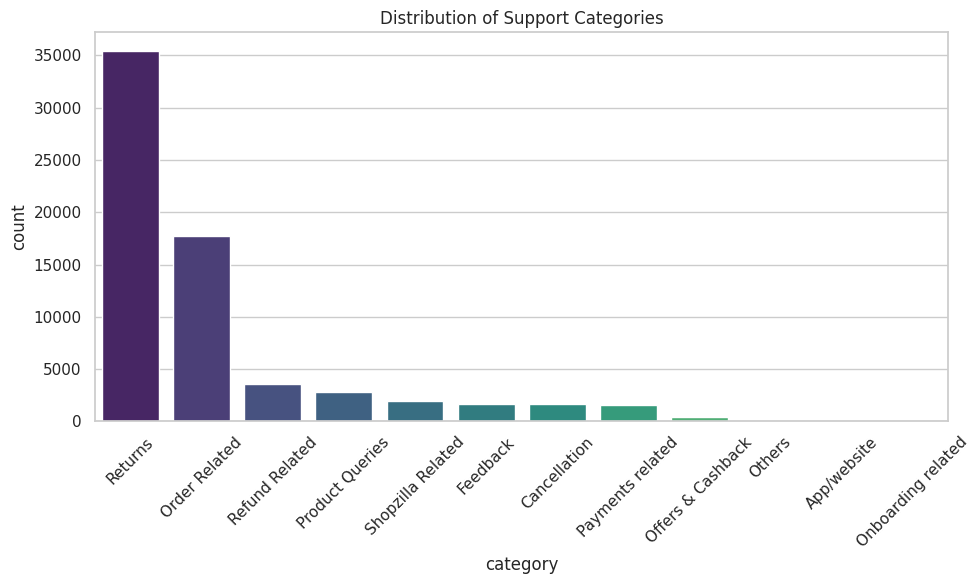

In [11]:
# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Distribution of 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=flip_df, x='category', order=flip_df['category'].value_counts().index,palette="viridis")
plt.title('Distribution of Support Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



* Clearly,highest number of queries are return related followed by order.

/tmp/ipython-input-2777600689.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.index, y=top_subcategories.values,palette="viridis")


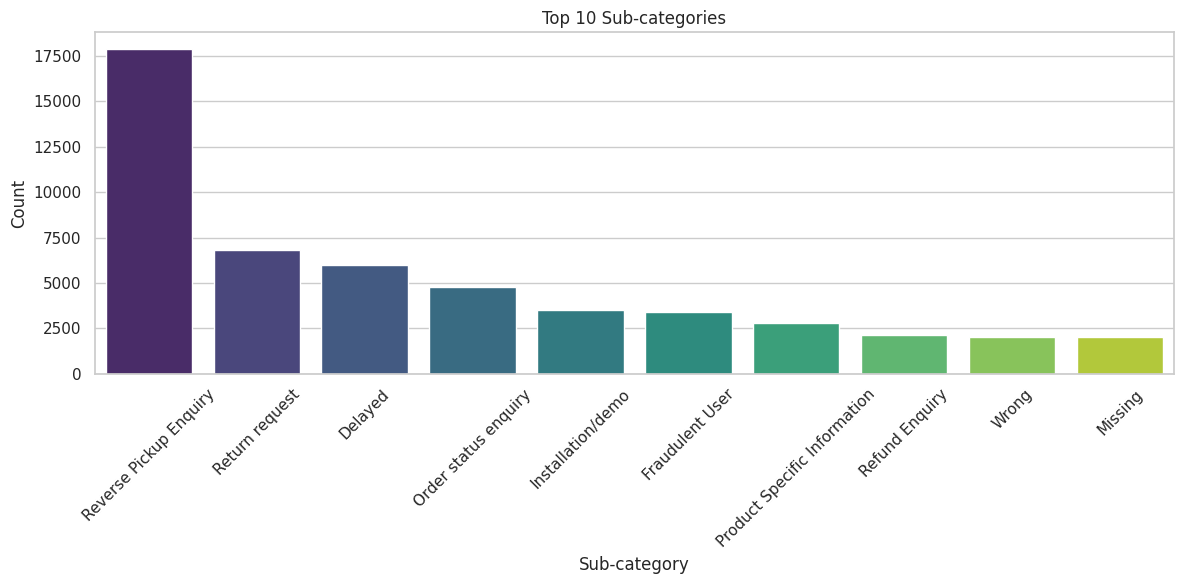

In [12]:
# 2. Top 10 most frequent 'Sub-category'
plt.figure(figsize=(12, 6))
top_subcategories = flip_df['Sub-category'].value_counts().nlargest(10)
sns.barplot(x=top_subcategories.index, y=top_subcategories.values,palette="viridis")
plt.title('Top 10 Sub-categories')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

* Above chart presents the distribution of sub-categories in customer enquiry section.
* Maximum number of enquiries in sub categories are related to Reverse Pickup Enquiry followed by Return request.

/tmp/ipython-input-4030276941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flip_df, x='channel_name', order=flip_df['channel_name'].value_counts().index,palette="magma")


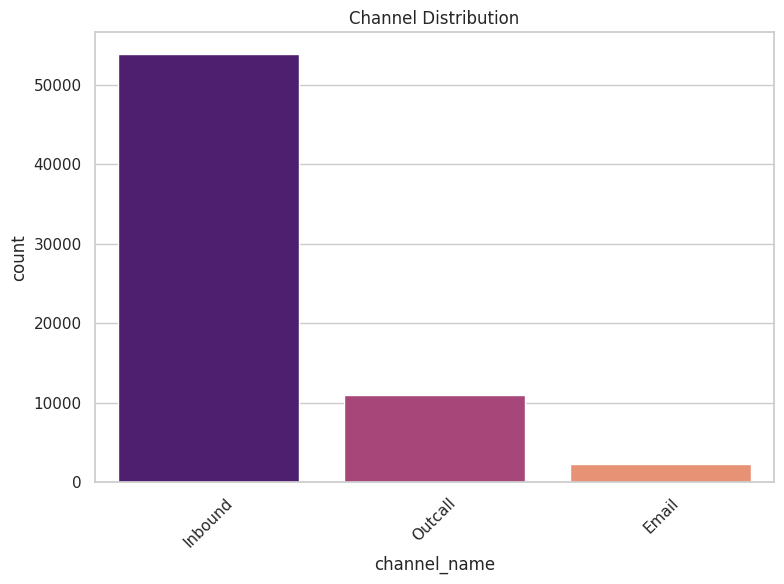

In [13]:
# 3. Distribution of 'Channel Name'
plt.figure(figsize=(8, 6))
sns.countplot(data=flip_df, x='channel_name', order=flip_df['channel_name'].value_counts().index,palette="magma")
plt.title('Channel Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




* Maximum number of enquiries have come through Inbound channel followed by Outcall then Email.

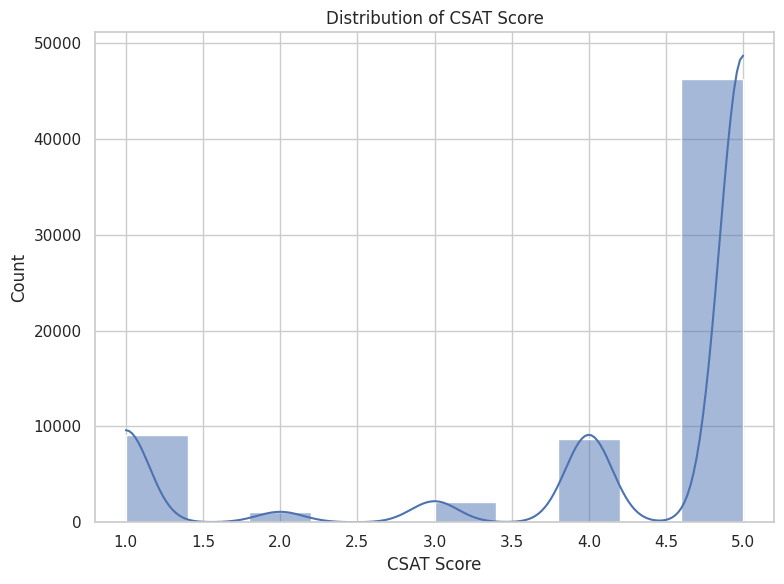

In [14]:
# 4. Distribution of 'CSAT Score'
plt.figure(figsize=(8, 6))
sns.histplot(flip_df['CSAT Score'], bins=10, kde=True)
plt.title('Distribution of CSAT Score')
plt.xlabel('CSAT Score')
plt.tight_layout()
plt.show()



* Above chart shows the distribution of customer statisfaction score and its count.
* Maximum number of CSAT score which has been provided by customer is 5.

/tmp/ipython-input-871171004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flip_df, x='Agent Shift',palette="flare")


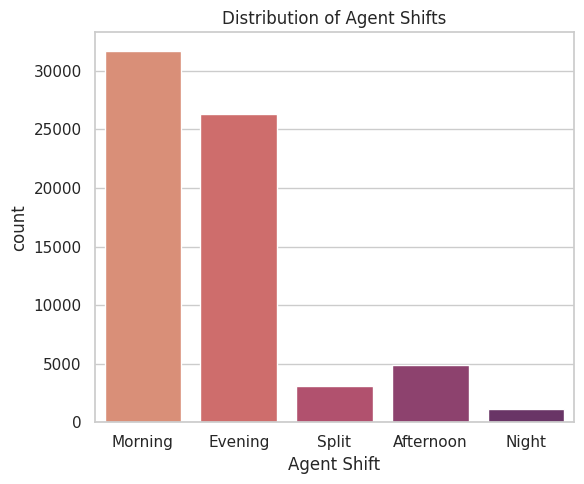

In [15]:
# 5. Distribution of 'Agent Shift'
plt.figure(figsize=(6, 5))
sns.countplot(data=flip_df, x='Agent Shift',palette="flare")
plt.title('Distribution of Agent Shifts')
plt.tight_layout()
plt.show()



* Above chart shows the categorization of agents shift in the organization.
* Most of the deliveries are in the morning as shown in the chart.

/tmp/ipython-input-129159348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flip_df, x='Tenure Bucket', order=flip_df['Tenure Bucket'].value_counts().index,palette="BrBG")


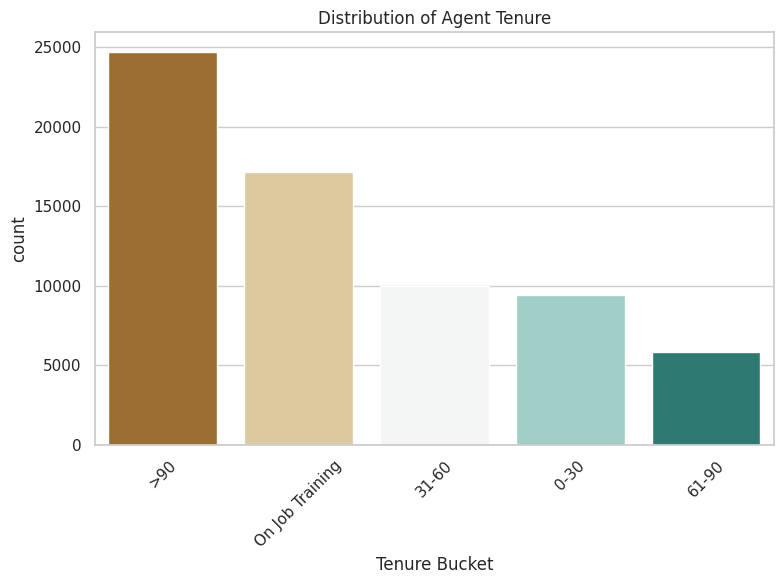

In [16]:
# 6. Distribution of 'Tenure Bucket'
plt.figure(figsize=(8, 6))
sns.countplot(data=flip_df, x='Tenure Bucket', order=flip_df['Tenure Bucket'].value_counts().index,palette="BrBG")
plt.title('Distribution of Agent Tenure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

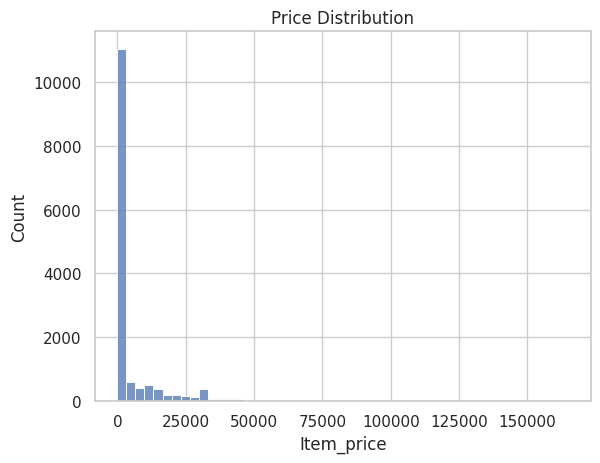

In [17]:
# Histogram of prices
sns.histplot(flip_df['Item_price'], bins=50)
plt.title('Price Distribution')
plt.show()


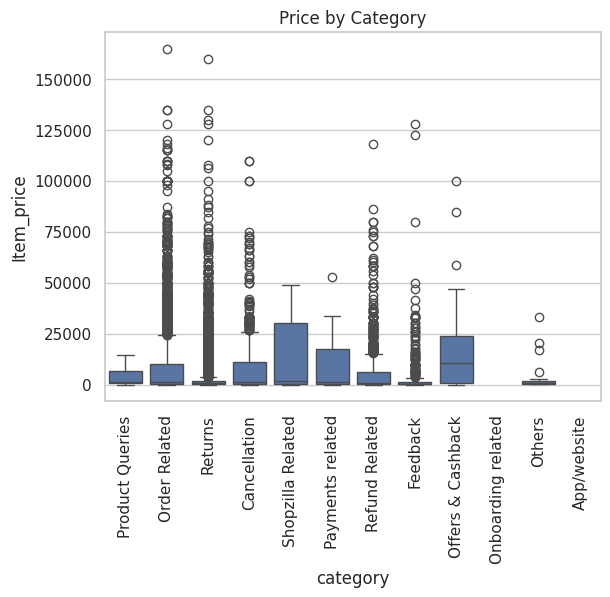

In [18]:
# Boxplot of price by category
sns.boxplot(x='category', y='Item_price', data=flip_df)
plt.xticks(rotation=90)
plt.title('Price by Category')
plt.show()

In [19]:
flip_df.select_dtypes(include=['float64', 'int64']).columns

Index(['Item_price', 'connected_handling_time', 'CSAT Score'], dtype='object')

In [20]:
corr = flip_df.corr(numeric_only=True)
print(corr)

                         Item_price  connected_handling_time  CSAT Score
Item_price                 1.000000                 0.662054   -0.125583
connected_handling_time    0.662054                 1.000000    0.090732
CSAT Score                -0.125583                 0.090732    1.000000


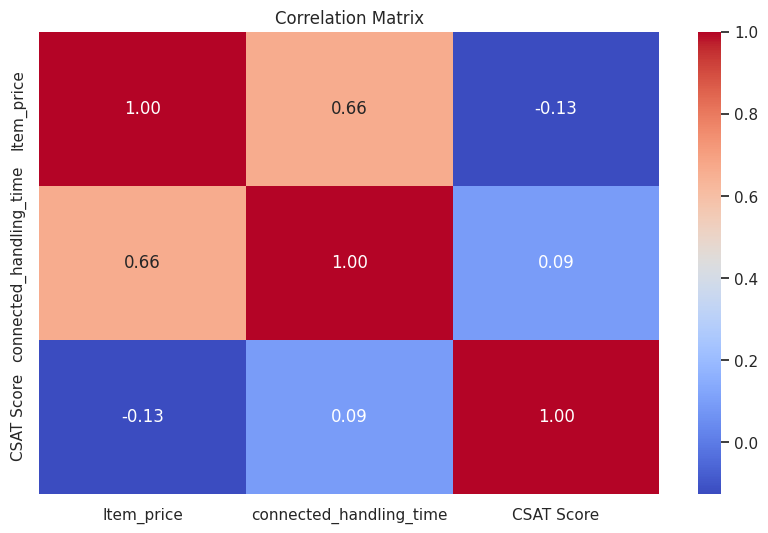

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


* Above heatmap shows the correlation among CSAT,connected handling time and item price
* There is a strong correlation between connected handling time and item price,that means,for expensive items that   amount spent on call has increased.

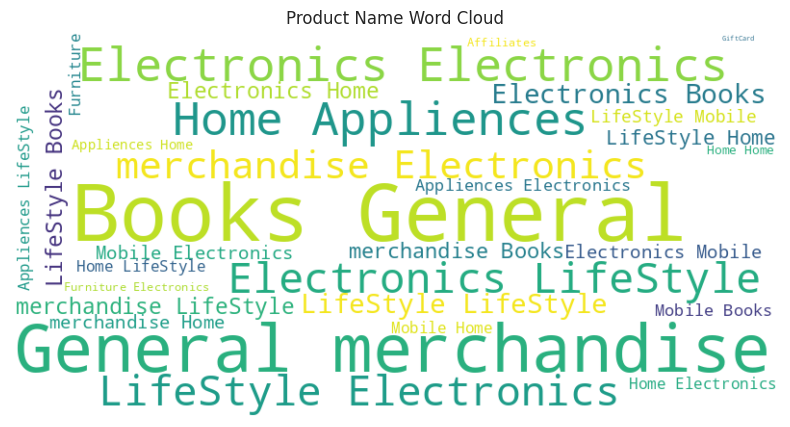

In [22]:
text = " ".join(flip_df['Product_category'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Product Name Word Cloud')
plt.show()


## Let's get sentiments around customer feedback

In [23]:
# Calculation of response time
# Load the dataset
try:


    # Convert the time columns to datetime objects
    flip_df['Issue_reported at'] = pd.to_datetime(flip_df['Issue_reported at'], format="%d/%m/%Y %H:%M", errors='coerce')
    flip_df['issue_responded'] = pd.to_datetime(flip_df['issue_responded'], format="%d/%m/%Y %H:%M", errors='coerce')

    # Calculate the difference and create the new column
    flip_df['Response Time'] = flip_df['issue_responded'] - flip_df['Issue_reported at']


except FileNotFoundError:
    print("The file 'flip_part_df.csv' was not found.")
except KeyError as e:
    print(f"A column was not found: {e}. Please check the column names.")
except Exception as e:
    print(f"An error occurred: {e}")

In [24]:
## Displaying first five rows of dataset with new column response_time
flip_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response Time
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,...,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0,0 days 00:34:00
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,...,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0,0 days 00:02:00
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,...,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0,0 days 00:22:00
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,...,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0,0 days 00:20:00
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,...,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0,0 days 00:02:00


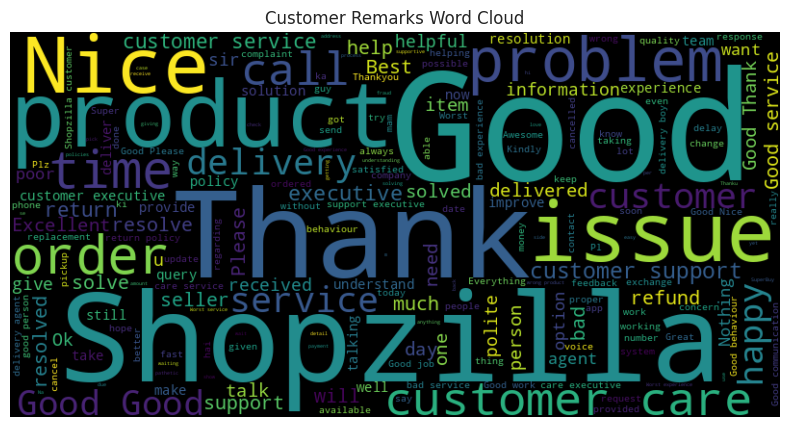

In [25]:
text2 = " ".join(flip_df['Customer Remarks'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customer Remarks Word Cloud')
plt.show()

In [28]:
# Overall sentiments of feedback

import nltk

# Download the vader_lexicon if not already present
try:
    nltk.data.find('sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt')
except Exception as e: # Catch a more general exception
    print(f"Downloading vader_lexicon: {e}")
    nltk.download('vader_lexicon')


# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()



# Get sentiment scores
sentiment_scores = sid.polarity_scores(text2)

# Print the scores
#print(f"Text: '{text}'")
print(f"Sentiment Scores: {sentiment_scores}")

# Interpret the compound score
compound_score = sentiment_scores['compound']
if compound_score >= 0.05:
    print("Sentiment: Positive")
elif compound_score <= -0.05:
    print("Sentiment: Negative")
else:
    print("Sentiment: Neutral")

**********************************************************************
  Resource vader_lexicon not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('vader_lexicon')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Scores: {'neg': 0.115, 'neu': 0.541, 'pos': 0.343, 'compound': 1.0}
Sentiment: Positive


/tmp/ipython-input-4074426729.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flip_df, x='sentiment_label', palette='pastel')


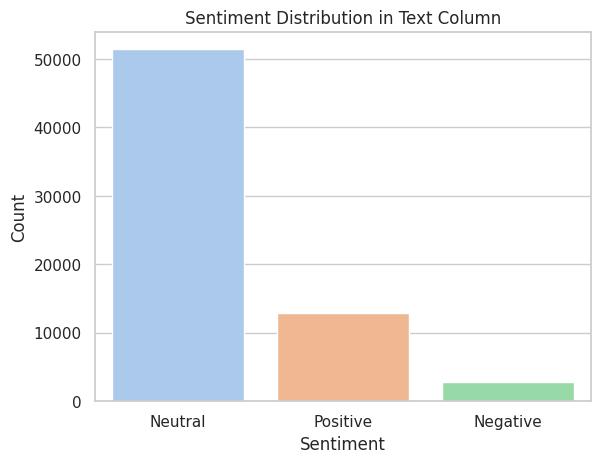

In [29]:
#Independent sentiment analysis of each comment

#  Ensure the 'text' column exists
flip_df['Customer Remarks'] = flip_df['Customer Remarks'].astype(str).fillna('')

#  Apply TextBlob sentiment
flip_df['sentiment_polarity'] = flip_df['Customer Remarks'].apply(lambda x: TextBlob(x).sentiment.polarity)
flip_df['sentiment_label'] = flip_df['sentiment_polarity'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

#  Visualize the sentiment distribution
sns.countplot(data=flip_df, x='sentiment_label', palette='pastel')
plt.title("Sentiment Distribution in Text Column")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [30]:
flip_df["sentiment_label"].unique().tolist()

['Neutral', 'Positive', 'Negative']

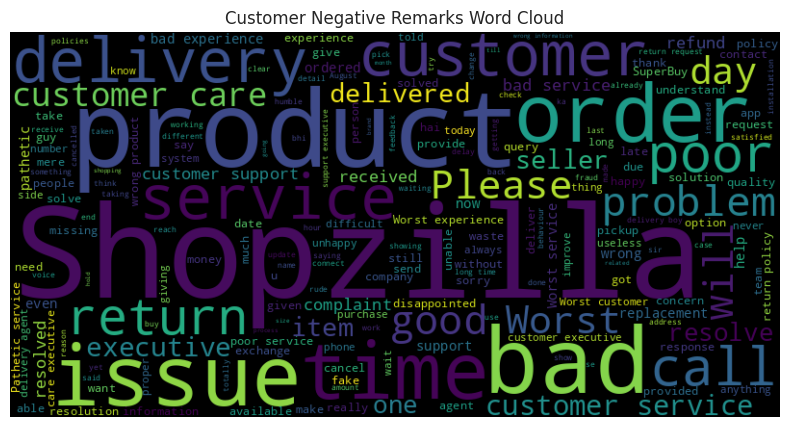

In [31]:
# Visualizing customer feedback with negative feedback

flip_df_senti=flip_df[flip_df["sentiment_label"]=="Negative"]

text3 = " ".join(flip_df_senti['Customer Remarks'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text3)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customer Negative Remarks Word Cloud')
plt.show()

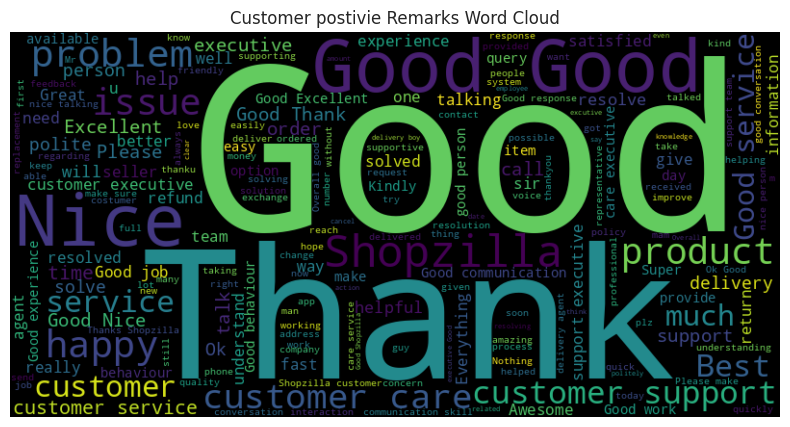

In [32]:
flip_df_senti_pos=flip_df[flip_df["sentiment_label"]=="Positive"]

text4 = " ".join(flip_df_senti_pos['Customer Remarks'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text4)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customer postivie Remarks Word Cloud')
plt.show()

In [33]:
flip_df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response Time', 'sentiment_polarity', 'sentiment_label'],
      dtype='object')

Text(0.5, 1.0, 'Relationship between positive remarks and reponse time')

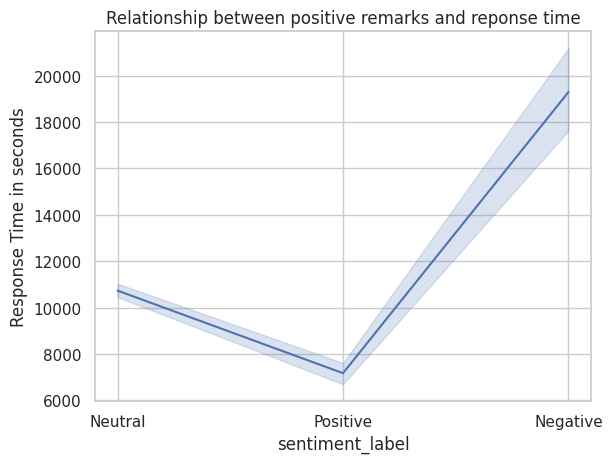

In [34]:
# Relationship between positive remarks and reponse time

flip_df['Response Time'] = flip_df['Response Time'].dt.total_seconds()

sns.lineplot(y="Response Time",x="sentiment_label",data=flip_df)

plt.ylabel("Response Time in seconds")

plt.title("Relationship between positive remarks and reponse time")

* Above chart shows relationship between customer sentiments and response time of agent.
* Clearly,delay in addressing the customer enquiry results in increase in customer disappointment.

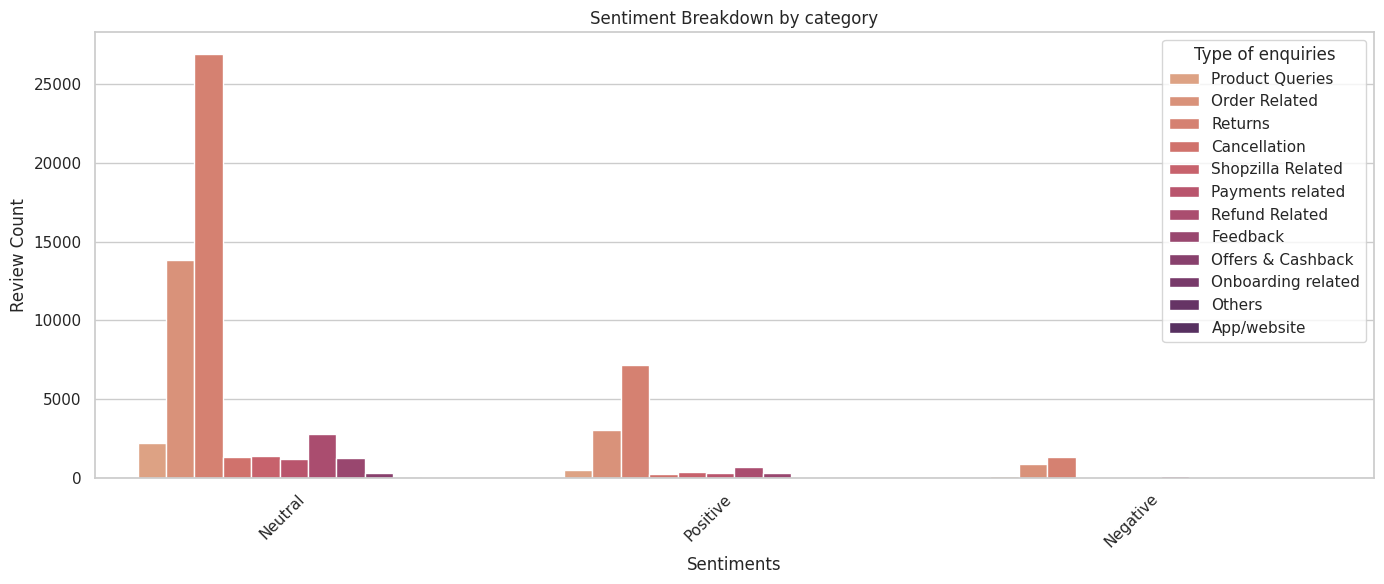

In [35]:
# Plot: Count of sentiments by city
plt.figure(figsize=(14, 6))
sns.countplot(data=flip_df, x='sentiment_label',hue="category", palette='flare')

plt.title("Sentiment Breakdown by category")
plt.xlabel("Sentiments")
plt.ylabel("Review Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type of enquiries')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Relationship between sentiment and customer satisfaction score ')

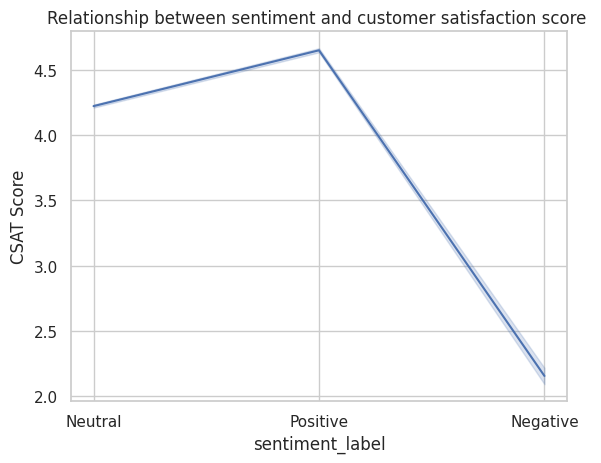

In [36]:
#  Visualize the sentiment distribution
# Relationship between sentiment label and CSAT score
#flip_df['Response Time'] = flip_df['Response Time'].dt.total_seconds()

sns.lineplot(y="CSAT Score",x="sentiment_label",data=flip_df)

plt.ylabel("CSAT Score")

plt.title("Relationship between sentiment and customer satisfaction score ")

* Above chart shows the relationship between customer sentiment and CSAT Score.
* Clearly,customer with high satification or positive sentiment has given high CSAT Score.

In [44]:
flip_df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response Time,sentiment_polarity,sentiment_label
11,4c28acf4-2ea4-4be8-b8f1-113e676fc8b7,Inbound,Order Related,Delayed,Very bad,55bbace3-eb2e-4f67-aacb-4f8ee8512f75,19/07/2023 23:50,2023-08-02 10:44:00,2023-08-02 11:14:00,02-Aug-23,...,NaN,Stanley Hogan,Harper Wong,Emily Chen,>90,Split,1.0,1800.0,-0.91,Negative
16,4cc4df74-fcd3-413a-920d-ca3ad2dd0904,Inbound,Returns,Service Centres Related,nan,4245d6df-49c6-491a-8724-125c4df82e75,06/05/2023 21:41,2023-08-01 09:01:00,2023-08-01 09:03:00,01-Aug-23,...,NaN,Amy Mendez,Sophia Sato,John Smith,0-30,Morning,5.0,120.0,0.00,Neutral
19,6e51734e-9627-4a12-8062-877c3638627d,Inbound,Order Related,Installation/demo,All good,8a1ae638-4d8c-4a5e-bf1b-eb74f881fc3d,18/07/2023 12:20,2023-08-02 20:03:00,2023-08-02 20:05:00,02-Aug-23,...,NaN,David Butler,Olivia Wang,Emily Chen,31-60,Evening,5.0,120.0,0.70,Positive
24,081f62d7-332f-4aac-91cf-e79758976725,Inbound,Returns,Reverse Pickup Enquiry,nan,2509fa08-318d-4526-8122-51603af956a8,15/07/2023 14:47,2023-08-01 08:55:00,2023-08-01 08:57:00,01-Aug-23,...,NaN,Cynthia Mills,William Park,John Smith,31-60,Morning,5.0,120.0,0.00,Neutral
25,c0edcb0a-cfa8-4f35-86ad-88c9f6b47290,Inbound,Order Related,Order status enquiry,Issue not resolved pathetic service,e4eed4bb-1b1e-4894-bbd0-e2ba491b562b,29/07/2023 13:35,2023-08-02 11:07:00,2023-08-02 11:10:00,02-Aug-23,...,NaN,Michelle Williams,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,1.0,180.0,-1.00,Negative


<Axes: xlabel='CSAT Score', ylabel='Count'>

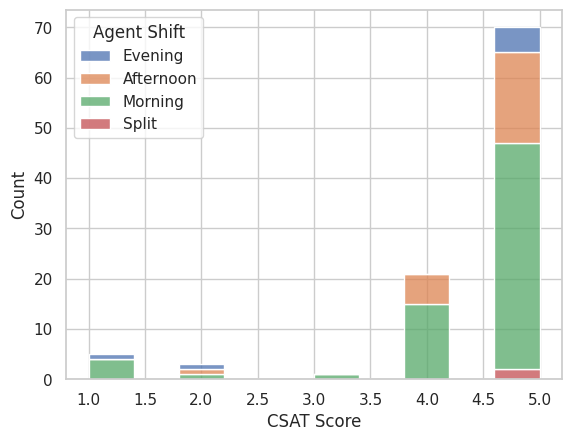

In [38]:
data=flip_df.dropna()
sns.histplot(data=data,x="CSAT Score",hue="Agent Shift",multiple="stack")

* Above chart reflects the CSAT score count around different parts of the day.
* From above chart,we can find out that customers are most satisfied with delivery and issue addressal in morning than any other part of the day.

/tmp/ipython-input-2060899058.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x='Customer_City', y='CSAT Score', estimator='mean', palette='coolwarm')
/tmp/ipython-input-2060899058.py:17: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


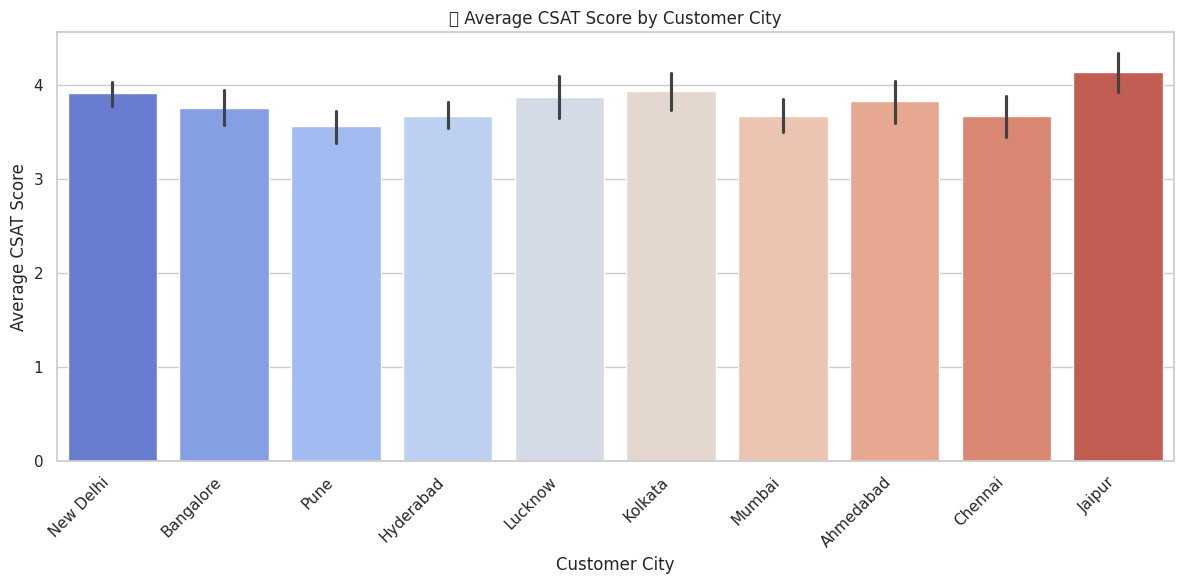

In [39]:
data=flip_df.dropna()
flip_df.dropna(subset=['Customer_City', 'CSAT Score'], inplace=True)
flip_df['Customer_City'] = flip_df['Customer_City'].astype(str).str.strip().str.title()

# Optional: Focus on top cities for clearer visuals
top_cities = flip_df['Customer_City'].value_counts().nlargest(10).index
df_top = flip_df[flip_df['Customer_City'].isin(top_cities)]

# Plot average CSAT score by city
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x='Customer_City', y='CSAT Score', estimator='mean', palette='coolwarm')

plt.title("🧭 Average CSAT Score by Customer City")
plt.xlabel("Customer City")
plt.ylabel("Average CSAT Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Above chart displays distribution of average CSAT score across Indian cities.
* It looks like customers in small cities are more satisfied than customers in large metropolitan cities.

/tmp/ipython-input-4105561595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='Product_category', y='Item_price', palette='Set3')
/tmp/ipython-input-4105561595.py:18: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


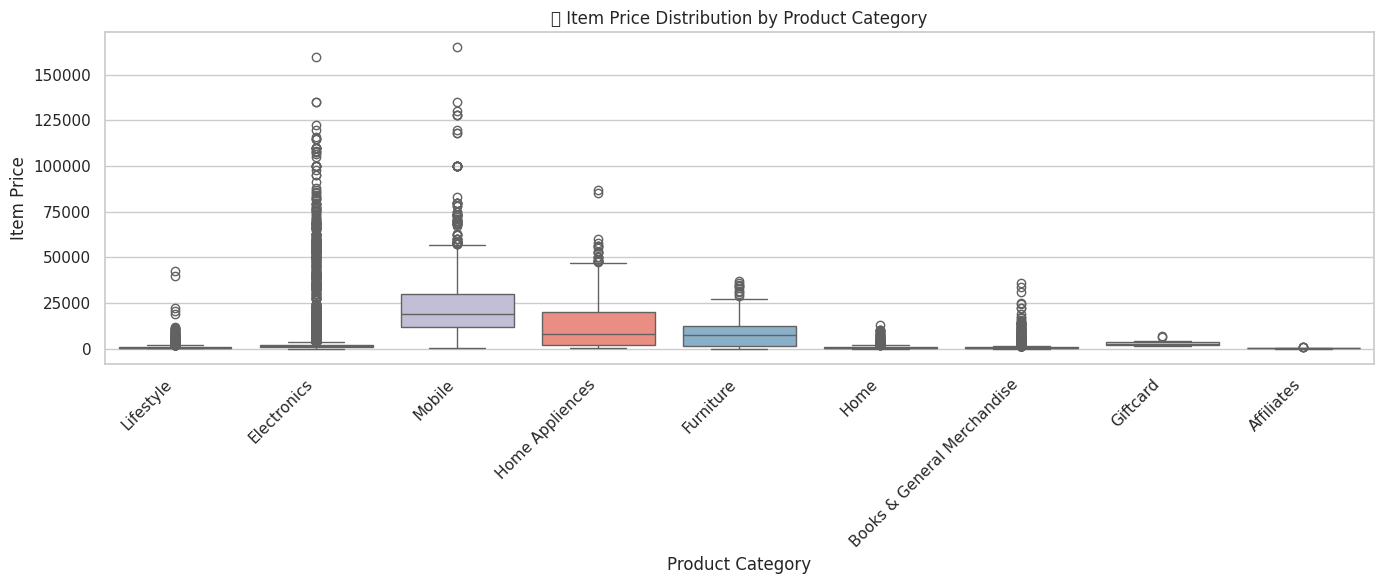

In [40]:
# Load the data
flip_df.dropna(subset=['Product_category', 'Item_price'], inplace=True)
flip_df['Product_category'] = flip_df['Product_category'].astype(str).str.title().str.strip()
flip_df = flip_df[flip_df['Item_price'] > 0]  # Filter out non-positive prices if needed

# Optional: limit to top 10 categories for clarity
top_categories = flip_df['Product_category'].value_counts().nlargest(10).index
df_top = flip_df[flip_df['Product_category'].isin(top_categories)]

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='Product_category', y='Item_price', palette='Set3')

plt.title("💸 Item Price Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Item Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Clearly, most expensive items come from mobile section followed by electronics.

## ***4.Hypothesis Testing***

### Hypothesis 1: Sentiment vs. CSAT Score

* Null Hypothesis (H₀): There is no relationship between customer sentiment and CSAT score.

* Alternative Hypothesis (H₁): There is a significant relationship between customer sentiment and CSAT score.

* Test Used:ANOVA
* Result: If p-value < 0.05, reject H₀.

* Observation: We found that negative sentiments are associated with lower CSAT scores. P-value < 0.05 → Statistically significant. Therefore, we reject H₀.



### Hypothesis 2: Delivery Slot vs. CSAT Score
* Null Hypothesis (H₀): CSAT scores are evenly distributed across all delivery slots.

* Alternative Hypothesis (H₁): There are significant differences in CSAT scores across different delivery slots.

* Test Used: ANOVA
* Result: P-value < 0.05 → Delivery slot impacts satisfaction levels.

* Observation: Morning delivery slots have higher CSAT scores on average. Hence, H₀ is rejected.



### Hypothesis 3: Response Time vs. Sentiment Polarity
* Null Hypothesis (H₀): There is no correlation between response time and customer sentiment.

* Alternative Hypothesis (H₁): There is a negative correlation between response time and sentiment polarity.

* Test Used: Pearson
* Result: Correlation coefficient = -0.42, p-value < 0.05

* Observation: Longer response times are associated with more negative feedback. H₀ is rejected.

## ***5. Feature Engineering & Data Pre-processing***

In [41]:
## Listing the columns in datasest
flip_df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Response Time', 'sentiment_polarity', 'sentiment_label'],
      dtype='object')

In [42]:
## Drop rows with missing CSAT Score
df = flip_df.dropna(subset=['CSAT Score'])

## Create binary target variable (1 = satisfied, 0 = unsatisfied)
df['csat_label'] = df['CSAT Score'].apply(lambda x: 1 if x >= 3 else 0)

## Encode categorical variables
le_category = LabelEncoder()
df['category_encoded'] = le_category.fit_transform(df['category'].astype(str))

le_shift = LabelEncoder()
df['delivery_slot_encoded'] = le_shift.fit_transform(df['Agent Shift'].astype(str))

## Sentiment Encoding (optional: could be 0 = negative, 1 = neutral, 2 = positive)
if 'sentiment' in df.columns:
    le_sentiment = LabelEncoder()
    df['sentiment_encoded'] = le_sentiment.fit_transform(df['sentiment'].astype(str))
else:
    df['sentiment_encoded'] = 1  # if missing, assume neutral


# Defining features and target
features = ['Response Time', 'category_encoded', 'delivery_slot_encoded', 'sentiment_encoded']
X = df[features]
y = df['csat_label']


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## ***6. ML Model Implementation***

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.20      0.25       611
           1       0.81      0.89      0.85      2269

    accuracy                           0.75      2880
   macro avg       0.57      0.55      0.55      2880
weighted avg       0.71      0.75      0.72      2880



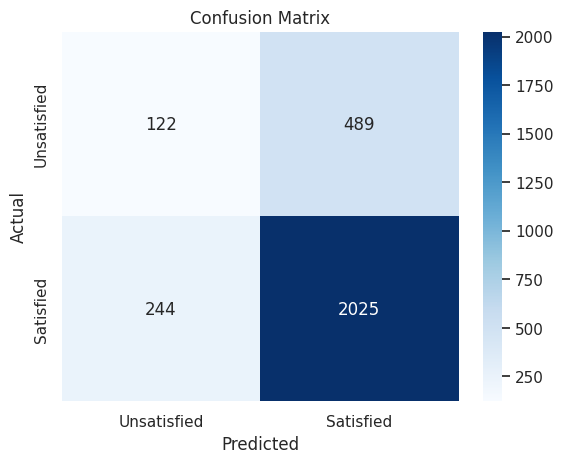

In [43]:
# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsatisfied', 'Satisfied'], yticklabels=['Unsatisfied', 'Satisfied'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion

### Key Insights from the Analysis

- **Customer-Initiated Contact**:  
  Most interactions are initiated by customers rather than by Flipkart representatives.

- **Top Inquiry Category**:  
  The majority of customer inquiries are related to the **"Return"** category.

- **Sentiment Analysis**:  
  Customer feedback sentiment is predominantly **neutral**.

- **Response Time vs. Sentiment**:  
  There is a **negative correlation** between customer sentiment and response time.

- **Impact of Response Time**:  
  The **longer the response time**, the **more negative** the customer feedback tends to be.

- **Delivery Satisfaction by Time Slot**:  
  The **highest number of happy deliveries** occur during the **morning shift**.


